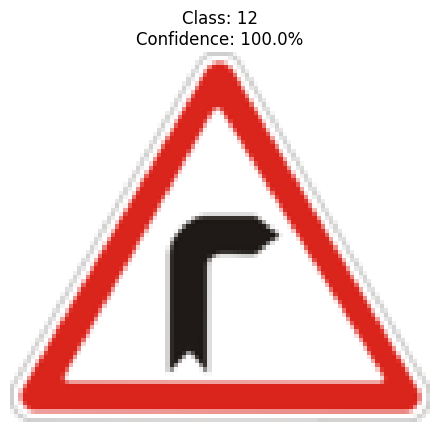

Результат: 12 (уверенность: 100.0%)


In [18]:
import torch
import torch.nn as nn
from PIL import Image
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

# Определение архитектуры модели (должно совпадать с обученной моделью)
class TrafficSignCNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_layers = nn.Sequential(
            nn.Conv2d(3, 32, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.Conv2d(32, 64, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        self.fc_layers = nn.Sequential(
            nn.Flatten(),
            nn.Linear(64 * 16 * 16, 128),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(128, 43)  # 43 класса для GTSRB
        )

    def forward(self, x):
        x = self.conv_layers(x)
        x = self.fc_layers(x)
        return x

# Загрузка модели
def load_model(model_path):
    model = TrafficSignCNN()
    model.load_state_dict(torch.load(model_path))
    model.eval()  # Режим предсказания
    return model

# Преобразование изображения
def process_image(image_path):
    transform = transforms.Compose([
        transforms.Resize((64, 64)),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
    ])
    image = Image.open(image_path).convert('RGB')
    return transform(image).unsqueeze(0)  # Добавляем batch-размер

# Предсказание
def predict(image_path, model, class_names=None):
    image_tensor = process_image(image_path)
    with torch.no_grad():
        outputs = model(image_tensor)
        _, predicted = torch.max(outputs, 1)
        prob = torch.nn.functional.softmax(outputs, dim=1)[0] * 100
    
    if class_names:
        return class_names[predicted.item()], prob[predicted.item()].item()
    return predicted.item(), prob[predicted.item()].item()

# Пример использования
model = load_model('traffic_sign_cnn.pth')

# Словарь классов (замените на ваши метки)
class_names = None #{
#     0: "Speed limit 20", 
#     1: "Speed limit 30",
#     # ... остальные 43 класса
# }

# Предсказание для одного изображения
image_path = "D:\\archive\\Meta\\20.png"  # Укажите путь к вашему изображению
pred_class, confidence = predict(image_path, model, class_names)

# Визуализация
image = Image.open(image_path)
plt.imshow(image)
plt.title(f"Class: {pred_class}\nConfidence: {confidence:.1f}%")
plt.axis('off')
plt.show()

print(f"Результат: {pred_class} (уверенность: {confidence:.1f}%)")